# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [4]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [7]:
customer_preferences = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')

In [8]:
customer_preferences.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?

**Answer:**

1) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Café) or Retail channel (Nominal)

2) REGION: customers Region - Lisnon, Oporto or Other (Nominal)

3) FRESH: annual spending (m.u.) on fresh products (Continuous)

4) MILK: annual spending (m.u.) on milk products (Continuous)

5) GROCERY: annual spending (m.u.)on grocery products (Continuous)

6) FROZEN: annual spending (m.u.)on frozen products (Continuous)

7) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

8) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)

* Any categorical data to convert?

In [27]:
customer_preferences.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

**Answer: No**

* Any missing data to remove?

In [17]:
customer_preferences.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

**Answer: No**

* Column collinearity - any high correlations?

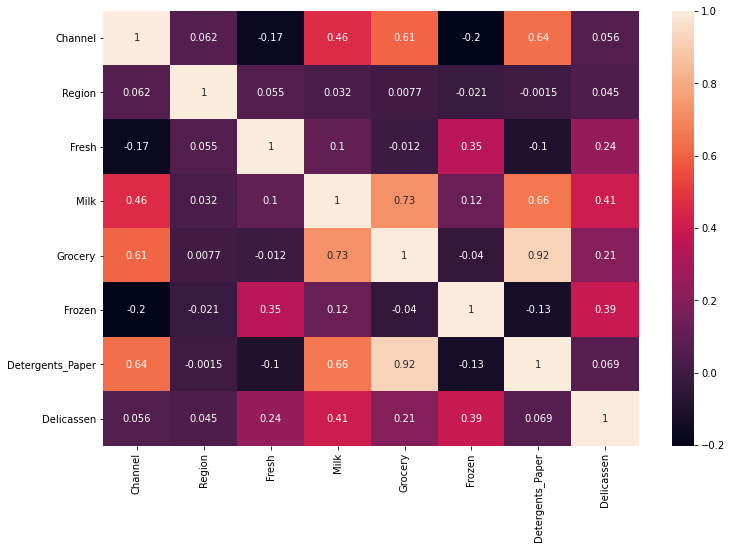

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(customer_preferences.corr(), annot=True)

**Answer: The highest correlation (0.92) is bettween Detergents Paper and Grocery. Grocery and Milk also have a significant correlation (0.73).**

* Descriptive statistics - any outliers to remove?

In [26]:
customer_preferences.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**PS: value ranges are very different between categories, as Fresh and Delicassen.**

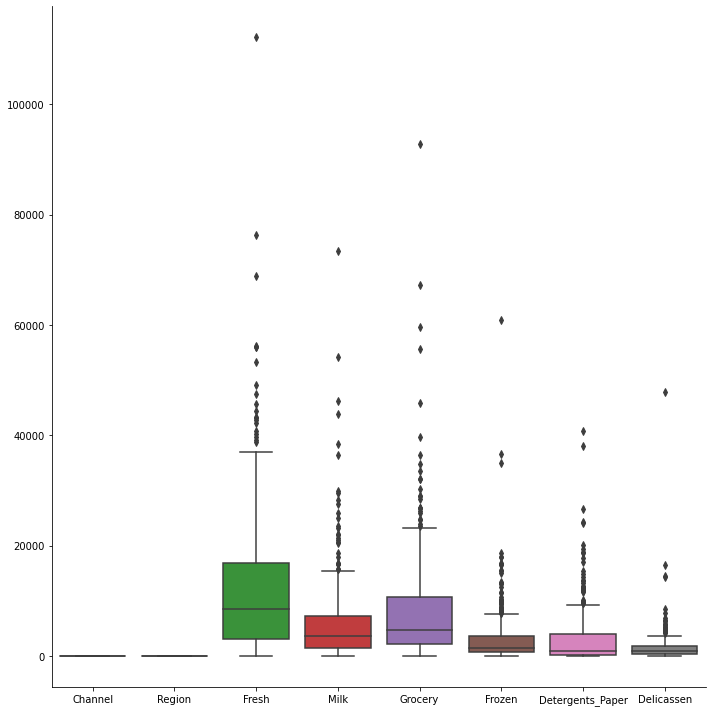

In [23]:
sns.catplot(data = customer_preferences, kind = 'box', height = 10)

**Answer: Yes, it has some observations that are outliers than the others and the mean.**

* Column-wise data distribution - is the distribution skewed?

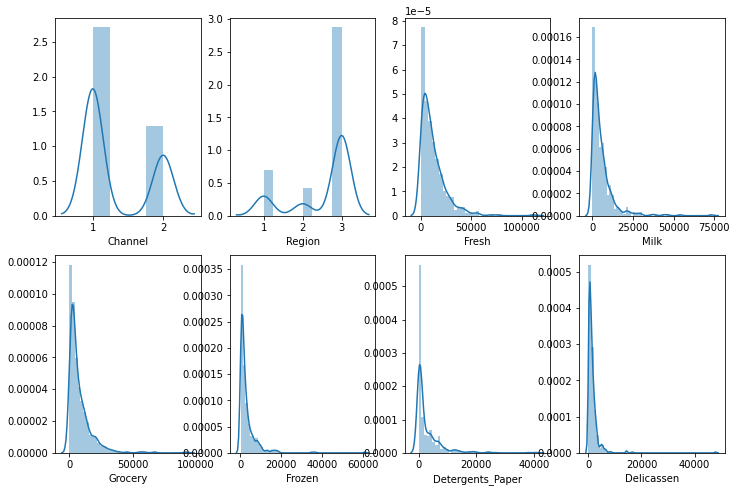

In [28]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (12, 8))
sns.distplot(customer_preferences['Channel'], ax = ax[0, 0])
sns.distplot(customer_preferences['Region'], ax = ax[0, 1])
sns.distplot(customer_preferences['Fresh'], ax = ax[0, 2])
sns.distplot(customer_preferences['Milk'], ax = ax[0, 3])
sns.distplot(customer_preferences['Grocery'], ax = ax[1, 0])
sns.distplot(customer_preferences['Frozen'], ax = ax[1, 1])
sns.distplot(customer_preferences['Detergents_Paper'], ax = ax[1, 2])
sns.distplot(customer_preferences['Delicassen'], ax = ax[1, 3])

**Answer: Yes, the distributions are skewed to the left. It has more concentration of the annual spending on products to the left, that is, it has few observations with high numbers (looking at the graphic) and some are outliers.**

* Does this database confirm the Pareto principle?

**Fresh**

In [50]:
customer_preferences.nlargest(88, ['Fresh']).sum()

Channel             1.060000e+02
Region              2.310000e+02
Fresh               2.781220e+06
Milk                6.369400e+05
Grocery             6.858290e+05
Frozen              4.979310e+05
Detergents_Paper    1.787460e+05
Delicassen          2.416910e+05
cumpercentage       4.408397e+03
dtype: float64

In [45]:
customer_preferences['Fresh'].sum()

5280131

In [51]:
2780000/5280131

0.5265020886792392

**Milk**

In [59]:
customer_preferences.nlargest(88, ['Milk']).sum()

Channel             1.560000e+02
Region              2.250000e+02
Fresh               9.330220e+05
Milk                1.429581e+06
Grocery             1.659671e+06
Frozen              2.995100e+05
Detergents_Paper    6.833490e+05
Delicassen          2.432010e+05
cumpercentage       3.864273e+03
dtype: float64

In [60]:
customer_preferences['Milk'].sum()

2550357

In [61]:
1420000/2550357

0.5567847952267074

**Grocery**

In [62]:
customer_preferences.nlargest(88, ['Grocery']).sum()

Channel             1.620000e+02
Region              2.230000e+02
Fresh               9.437670e+05
Milk                1.265313e+06
Grocery             1.948257e+06
Frozen              2.898340e+05
Detergents_Paper    8.216150e+05
Delicassen          2.422410e+05
cumpercentage       4.328701e+03
dtype: float64

In [63]:
customer_preferences['Grocery'].sum()

3498562

In [64]:
1940000/3498562

0.5545135401344895

**Frozen**

In [65]:
customer_preferences.nlargest(88, ['Frozen']).sum()

Channel             9.700000e+01
Region              2.170000e+02
Fresh               1.787343e+06
Milk                5.777690e+05
Grocery             5.625920e+05
Frozen              8.431780e+05
Detergents_Paper    1.343940e+05
Delicassen          2.478660e+05
cumpercentage       4.827259e+03
dtype: float64

In [66]:
customer_preferences['Frozen'].sum()

1351650

In [67]:
843000/1351650

0.6236821662412607

**Detergents_Paper**

In [69]:
customer_preferences.nlargest(88, ['Detergents_Paper']).sum()

Channel             1.700000e+02
Region              2.210000e+02
Fresh               6.908990e+05
Milk                1.164391e+06
Grocery             1.845679e+06
Frozen              1.504560e+05
Detergents_Paper    8.837800e+05
Delicassen          1.491990e+05
cumpercentage       4.075212e+03
dtype: float64

In [70]:
customer_preferences['Detergents_Paper'].sum()

1267857

In [71]:
883000/1267857

0.6964507826986798

**Delicassen**

In [72]:
customer_preferences.nlargest(88, ['Delicassen']).sum()

Channel             1.270000e+02
Region              2.240000e+02
Fresh               1.624391e+06
Milk                8.728720e+05
Grocery             1.060137e+06
Frozen              4.854850e+05
Detergents_Paper    3.568970e+05
Delicassen          3.850500e+05
cumpercentage       4.080758e+03
dtype: float64

In [73]:
customer_preferences['Delicassen'].sum()

670943

In [74]:
385000/670943

0.5738192365074232

**Answer:**

**88 represents 20% of the total of consumers (Total = 440). Looking at the 88 highest values for each column, it does not represent 80% of the total of annual spending. So, no columns confirm the Pareto principle.**

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

**-**

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [75]:
from sklearn.preprocessing import StandardScaler

In [77]:
scale = StandardScaler()
customers_scale = scale.fit_transform(customer_preferences[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

In [78]:
customers_scale

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

**PS: This is useful when you want to compare data that correspond to different units. In that case, you want to remove the units. To do that in a consistent way of all the data, you transform the data in a way that the variance is unitary and that the mean of the series is 0.**

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [79]:
from sklearn.cluster import KMeans

In [82]:
kmeans = KMeans()
customer_clusters = kmeans.fit(customers_scale)
customer_preferences['label'] = customer_clusters.labels_

Count the values in `labels`.

In [83]:
customer_preferences['label'].value_counts()

0    240
1     99
2     64
7     26
4      4
3      4
6      2
5      1
Name: label, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [84]:
from sklearn.cluster import DBSCAN

In [86]:
db = DBSCAN(eps=0.5)
customer_clusters2 = db.fit(customers_scale)
customer_preferences['labels_DBSCAN'] = customer_clusters2.labels_

Count the values in `labels_DBSCAN`.

In [87]:
customer_preferences['labels_DBSCAN'].value_counts()

 0    261
-1    174
 1      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

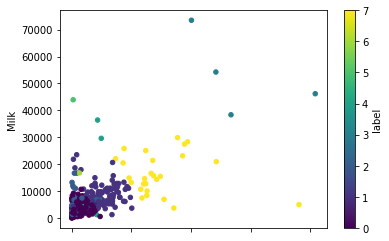

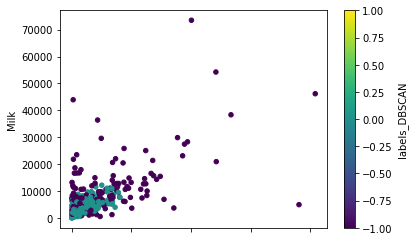

In [90]:
customer_preferences.plot(kind = 'scatter', x = 'Detergents_Paper', y = 'Milk', c = 'label', cmap="viridis")
customer_preferences.plot(kind = 'scatter', x = 'Detergents_Paper', y = 'Milk', c = 'labels_DBSCAN', cmap="viridis")

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

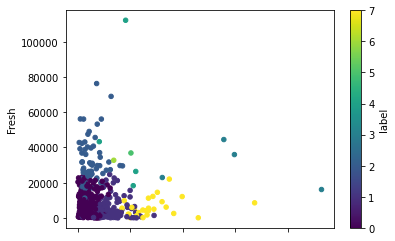

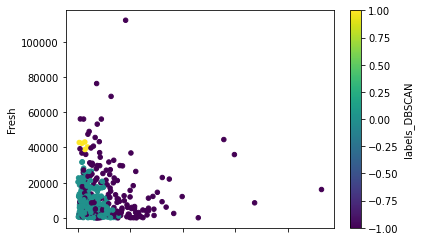

In [91]:
customer_preferences.plot(kind = 'scatter', x = 'Grocery', y = 'Fresh', c = 'label', cmap="viridis")
customer_preferences.plot(kind = 'scatter', x = 'Grocery', y = 'Fresh', c = 'labels_DBSCAN', cmap="viridis")

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

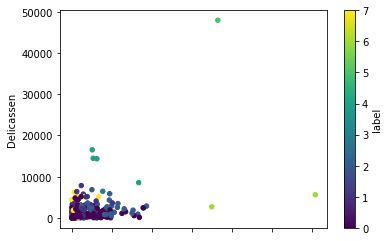

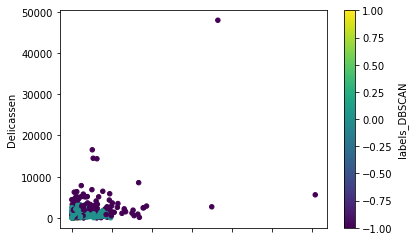

In [92]:
customer_preferences.plot(kind = 'scatter', x = 'Frozen', y = 'Delicassen', c = 'label', cmap="viridis")
customer_preferences.plot(kind = 'scatter', x = 'Frozen', y = 'Delicassen', c = 'labels_DBSCAN', cmap="viridis")

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [95]:
customer_preferences.groupby(by = 'label').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cumpercentage,labels_DBSCAN
label,,,,,,,,,,
0,1.091667,2.512500,8726.241667,2558.354167,3337.616667,2515.070833,793.862500,911.908333,54.771384,-0.141667
1,1.818182,2.606061,5703.868687,8914.262626,13013.333333,1526.555556,5242.232323,1559.838384,45.936256,-0.575758
2,1.125000,2.578125,32218.656250,4344.343750,5060.671875,5829.359375,761.437500,1840.578125,55.637212,-0.640625
3,2.000000,3.000000,29862.500000,53080.750000,60015.750000,3262.250000,27942.250000,3082.250000,18.596816,-1.000000
4,1.250000,3.000000,50020.000000,18085.250000,17331.500000,8396.000000,3759.250000,13474.000000,23.235162,-1.000000
5,1.000000,3.000000,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,46.024994,-1.000000
6,1.000000,2.500000,22015.500000,9937.000000,7844.000000,47939.000000,671.500000,4153.500000,50.764621,-1.000000
7,2.000000,2.346154,6105.692308,16435.153846,28464.769231,1722.307692,14662.653846,2207.269231,49.968333,-1.000000


In [96]:
customer_preferences.groupby(by = 'labels_DBSCAN').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cumpercentage,label
labels_DBSCAN,,,,,,,,,,
-1,1.522989,2.551724,15608.988506,10000.408046,13693.298851,4786.275862,5291.373563,2510.781609,49.034279,2.160920
0,1.195402,2.528736,9030.398467,3077.318008,4234.061303,1963.432950,1322.134100,881.773946,53.897296,0.260536
1,1.000000,3.000000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,53.700626,2.000000


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [99]:
pip install yellowbrick

     |████████████████████████████████| 263 kB 637 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [100]:
from yellowbrick.cluster import KElbowVisualizer

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


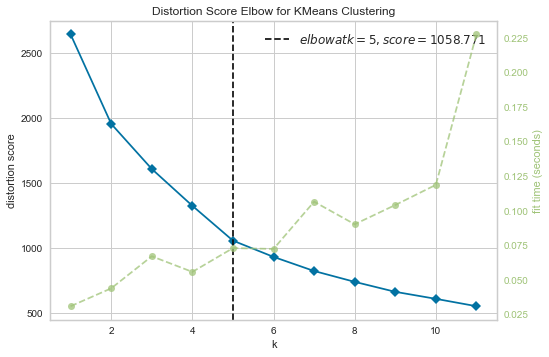

In [101]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(customers_scale)       
visualizer.show()    

In [103]:
kmeans = KMeans(n_clusters = 5) # Optimal cluster quantity was defined above
customer_clusters3 = kmeans.fit(customers_scale)
customer_preferences['label'] = customer_clusters3.labels_
customer_preferences['label'].value_counts()

0    270
1     96
3     63
4     10
2      1
Name: label, dtype: int64

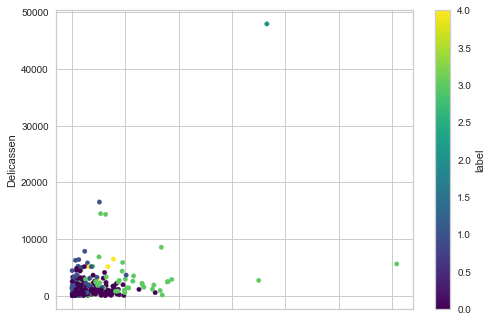

In [114]:
customer_preferences.plot(kind = 'scatter', x = 'Frozen', y = 'Delicassen', c = 'label', cmap = "viridis")

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [112]:
db = DBSCAN(eps=0.4, min_samples=10)
customer_clusters4 = db.fit(customers_scale)
customer_preferences['labels_DBSCAN'] = customer_clusters4.labels_
customer_preferences['labels_DBSCAN'].value_counts()

-1    293
 0    147
Name: labels_DBSCAN, dtype: int64

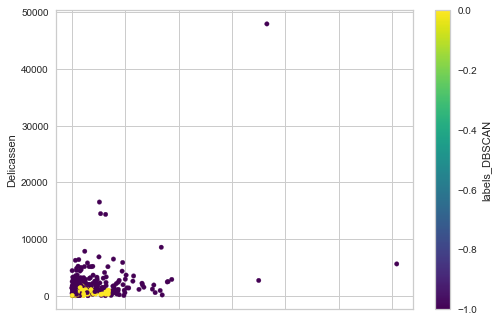

In [115]:
customer_preferences.plot(kind = 'scatter', x = 'Frozen', y = 'Delicassen', c = 'labels_DBSCAN', cmap = "viridis")